# Needs Met by Homeless Outreach Street Team Exploratory Notebook

## Import the Data

### Things to look out for in this data:
* What are the needs and how many were met?
* What are the total number of needs?
* Can we merge this set with another to give better data insights???
* Have we met more needs or less needs over the years?

In [7]:
import pandas as pd
from app import wrangle_with_dt, wrangle_without_dt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Run data through wrangle function to return clean df
df = wrangle_without_dt('Needs_met_by_Homeless_Outreach_Street_Team.csv')

In [10]:
# Dataset has only 30 entries. Displaying will not have any issues.
# View data and ensure proper porting via wrangle function
df

,Fiscal Year,Need Type,Number of Needs Met
0,2018,Basic Needs,156
1,2018,Benefit Linkage,56
2,2018,Coordinated Assessment,248
3,2018,Employment,13
4,2018,Identification documents,147
5,2018,Legal,8
6,2018,Linkage to Case Management Team,23
7,2018,MAP Cards,82
8,2018,Medical Support/ Linkage,133
9,2018,Mental Health Evaluation and Treatment Linkage,194


## Data Preprocessing

In [17]:
df['Need Type'].value_counts()

Basic Needs                                       2
Benefit Linkage                                   2
Coordinated Assessment                            2
Employment                                        2
Identification documents                          2
Legal                                             2
Linkage to Case Management Team                   2
MAP Cards                                         2
Medical Support/ Linkage                          2
Mental Health Evaluation and Treatment Linkage    2
Referral to APS                                   2
Shelter/linkage to housing services               2
Substance Use Services Linkage                    2
Transportation                                    2
Diversion out of Homelessness                     1
Peer Support Services                             1
Name: Need Type, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Fiscal Year          30 non-null     int64 
 1   Need Type            30 non-null     object
 2   Number of Needs Met  30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [12]:
print(df.describe(include='all'))
print(df.describe())

        Fiscal Year    Need Type  Number of Needs Met
count     30.000000           30            30.000000
unique          NaN           16                  NaN
top             NaN  Basic Needs                  NaN
freq            NaN            2                  NaN
mean    2018.533333          NaN           149.133333
std        0.507416          NaN           140.751121
min     2018.000000          NaN             1.000000
25%     2018.000000          NaN            25.750000
50%     2019.000000          NaN           107.000000
75%     2019.000000          NaN           247.500000
max     2019.000000          NaN           467.000000
       Fiscal Year  Number of Needs Met
count    30.000000            30.000000
mean   2018.533333           149.133333
std       0.507416           140.751121
min    2018.000000             1.000000
25%    2018.000000            25.750000
50%    2019.000000           107.000000
75%    2019.000000           247.500000
max    2019.000000           467

We can see the top need type is Basic Needs. 

In [6]:
# Look at total number of unique values
df.nunique()

Fiscal Year             2
Need Type              16
Number of Needs Met    29
dtype: int64

Text(0.5, 1.0, 'Distribution of Needs in 2018')

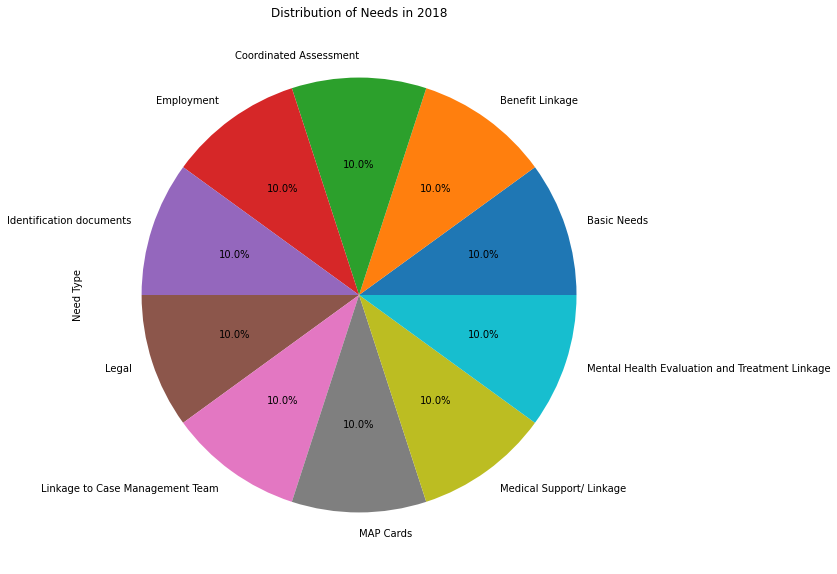

In [28]:
df['Need Type'].head(10).value_counts().plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Distribution of Needs in 2018')

Text(0.5, 1.0, 'Distribution of Needs in 2019')

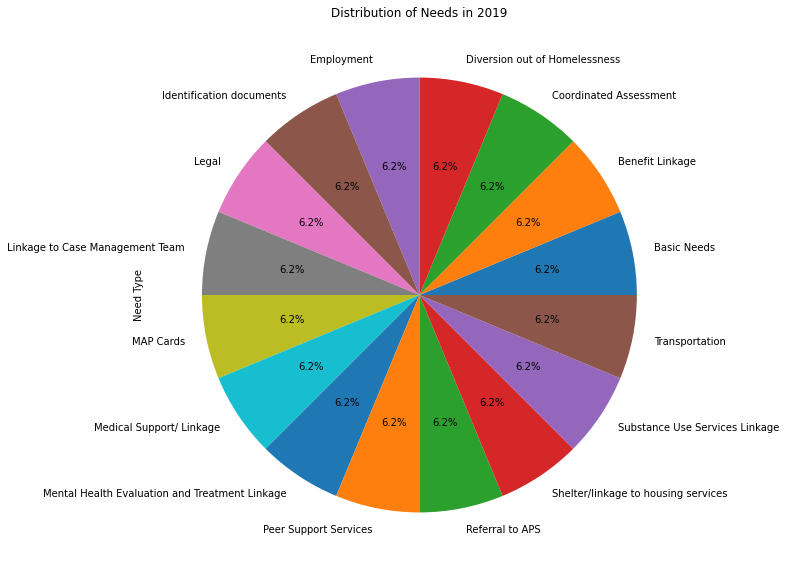

In [31]:
df['Need Type'].tail(16).value_counts().plot.pie(figsize=(10,10), autopct = '%1.1f%%')
plt.title("Distribution of Needs in 2019")

### Important take-aways:
* What happened to the numbers here? We see a decrease? Why? What changed? What didn't?



<AxesSubplot:>

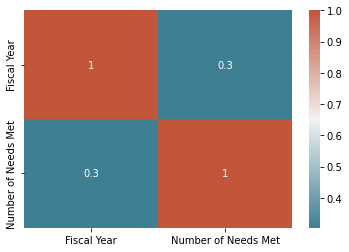

In [33]:
# Create a correlation matrix
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Such a small dataset with such small number of features will not add any value on it's own. We need to look into merging/joining this with a different table to make it more effective.

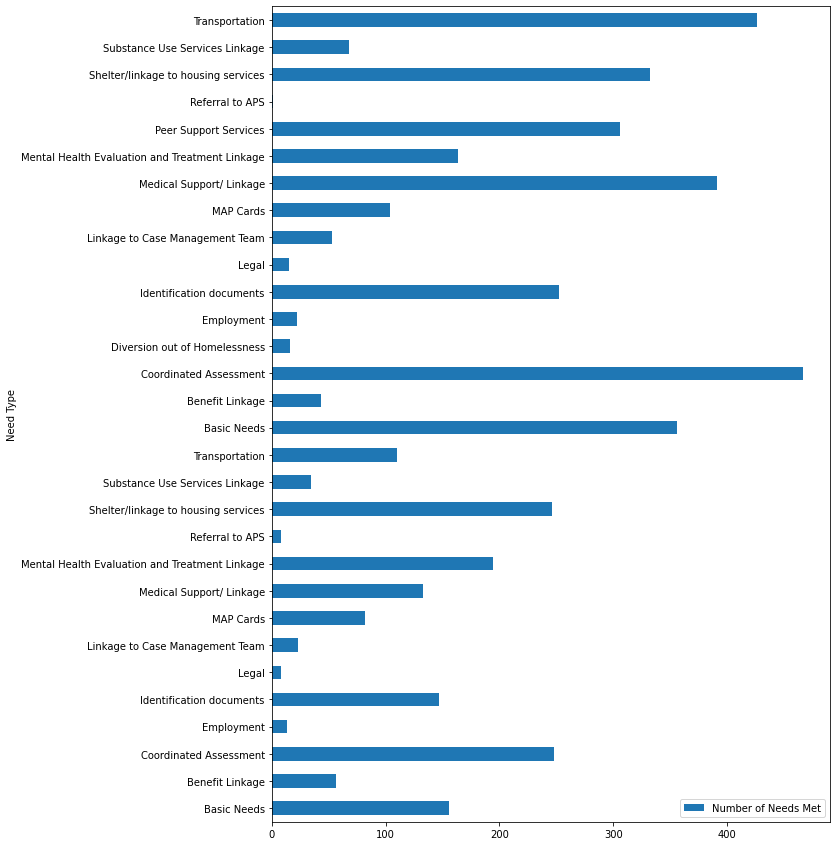

In [38]:
df.plot(kind='barh', x='Need Type', y='Number of Needs Met', figsize=(10,15));

In [39]:
mask = df['Fiscal Year'] == 2019

df_2019 = df[mask]
df_2018 = df[~mask]

In [40]:
df_2018

,Fiscal Year,Need Type,Number of Needs Met
0,2018,Basic Needs,156
1,2018,Benefit Linkage,56
2,2018,Coordinated Assessment,248
3,2018,Employment,13
4,2018,Identification documents,147
5,2018,Legal,8
6,2018,Linkage to Case Management Team,23
7,2018,MAP Cards,82
8,2018,Medical Support/ Linkage,133
9,2018,Mental Health Evaluation and Treatment Linkage,194


In [41]:
df_2019

,Fiscal Year,Need Type,Number of Needs Met
14,2019,Basic Needs,356
15,2019,Benefit Linkage,43
16,2019,Coordinated Assessment,467
17,2019,Diversion out of Homelessness,16
18,2019,Employment,22
19,2019,Identification documents,252
20,2019,Legal,15
21,2019,Linkage to Case Management Team,53
22,2019,MAP Cards,104
23,2019,Medical Support/ Linkage,391


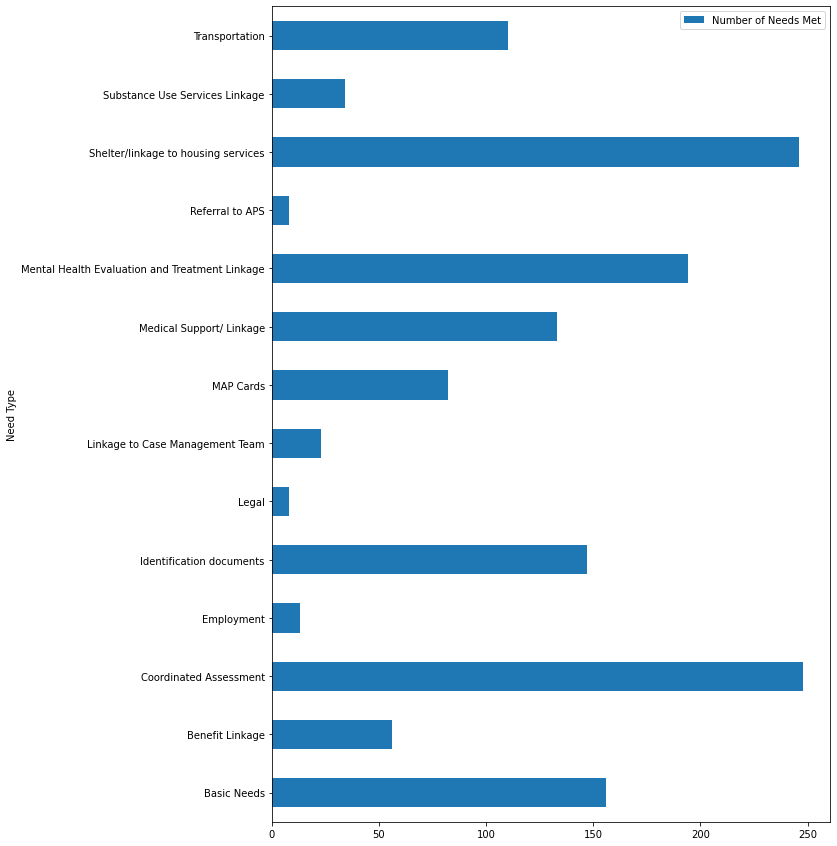

In [42]:
df_2018.plot(kind='barh', x='Need Type', y='Number of Needs Met', figsize=(10,15));

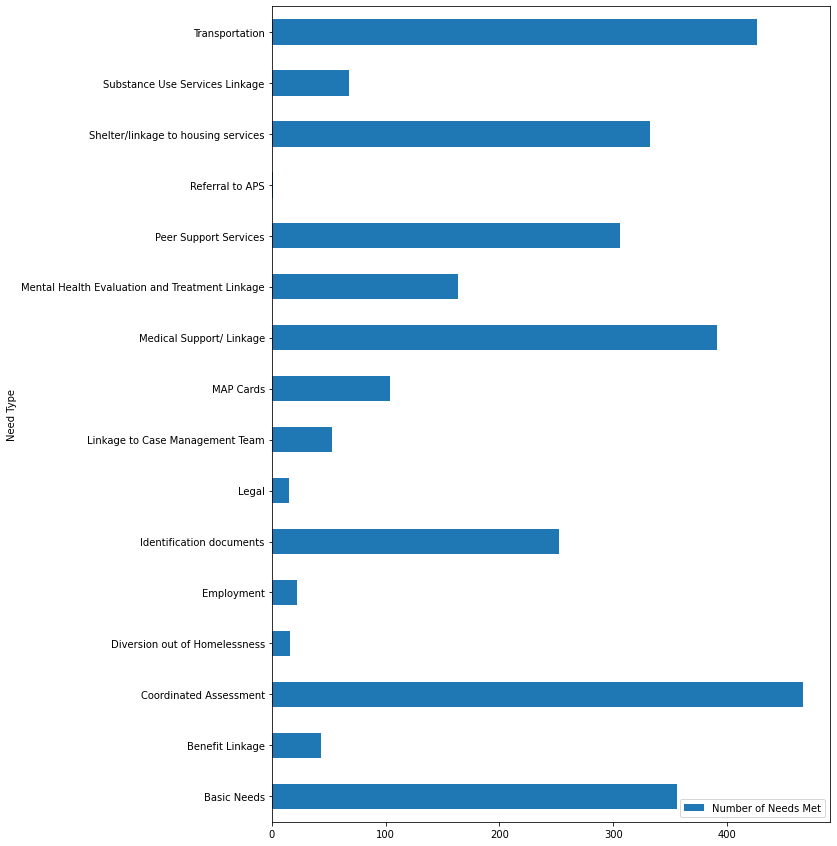

In [43]:
df_2019.plot(kind='barh', x='Need Type', y='Number of Needs Met', figsize=(10,15));

Text(0, 0.5, 'Number of times this Number Occurs')

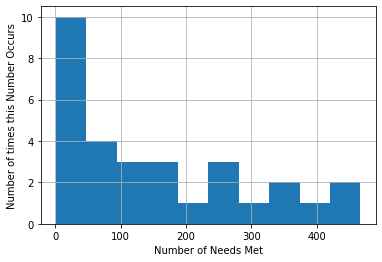

In [46]:
df['Number of Needs Met'].hist();
plt.xlabel('Number of Needs Met')
plt.ylabel('Number of times this Number Occurs')